In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

Here I am Importing all the neccessary libraries that i can use 

PANDAS- To Upload files and read the content of files

NUMPY- Numpy as you know updated for mathematical problems

MATPLOTLIB and SEABORN- For plotting graphs that related to data.

In [4]:
data=pd.read_csv(r"E:\Data Analysis\DATA FILES\international-airline-passengers.csv",skipfooter=2)

C:\Users\kssee\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [5]:
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Here is the header of the data from international-airline-passengers 

In [6]:
data.tail()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


Here is the tail or end contents of the data from international-airline-passengers to make sure no unwanted
data is prescent at the bottom

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Month                                                                           144 non-null    object
 1   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Data.info() shows the information about data the columns name data having data type and total rows

In [8]:
data["Month"]=pd.to_datetime(data["Month"])

pd.to_datetime used to specify Specify a date parse order if arg is str or its list-likes.

In [9]:
df=data.drop("Month",axis=1)
df.columns=["volume"]
df.index=data["Month"]
df.head()

,volume
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Dropping month from the columns
and assigning volume (volume of passangers) in data columns 
indexing the month 

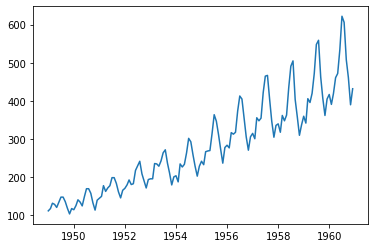

In [10]:
plt.plot(df)
plt.show()

plotting the data which timevarient

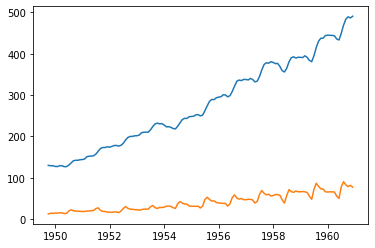

In [11]:
rolling_mean=df.rolling(10).mean()
rolling_sd=df.rolling(10).std()
plt.plot(rolling_mean)
plt.plot(rolling_sd)
plt.show()

Using rolling mean and standard deviation on data check the data how variation is happening

In [12]:
from statsmodels.tsa.stattools import adfuller
adfuller(df["volume"])

(0.8153688792060451,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

pvalue>0.5 null hypothesis is not standard and it is stationary 
pvalue<0.05 null hyphotesis is stationary
Using aduller method here can see the that pvalue>0.05 its around 0.8 so data is still not stationary

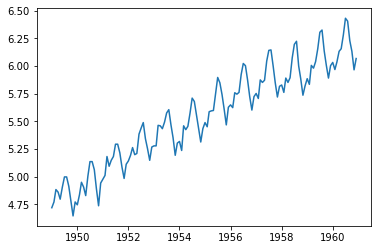

In [13]:
dflog=np.log(df)
plt.plot(dflog)
plt.show()

Using Numpy Log is applying on data to get the result as same but here its shows the log of mean and standard deviation is or small variation is there

In [14]:
dflog=dflog-dflog.shift(1)
dflog.head()

,volume
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022


Using Numpy Log and shift is applying on data to get the result similar to but not the same as the gross return calculated by pct_change()

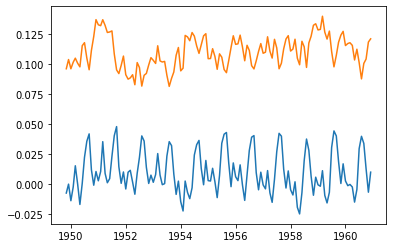

In [15]:
rolling_mean1=dflog.rolling(10).mean()
rolling_sd1=dflog.rolling(10).std()
plt.plot(rolling_mean1)
plt.plot(rolling_sd1)
plt.show()

Applying mean and std deviation to check my data after log function usage and now its 
showing the data is not varient but little more constant

In [16]:
from statsmodels.tsa.stattools import adfuller
adfuller(dflog["volume"].dropna())

(-2.7171305983881253,
 0.07112054815085994,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -440.35846985568105)

pvalue>0.5 null hypothesis is not standard and it is stationary 
pvalue<0.05 null hyphotesis is stationary
Using aduller method here can see the that pvalue>0.05 its around -2.717 so data is stationary

C:\Users\kssee\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


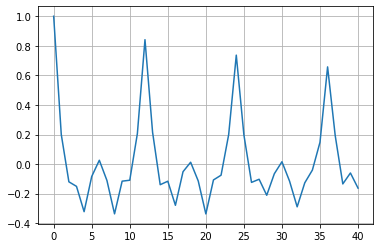

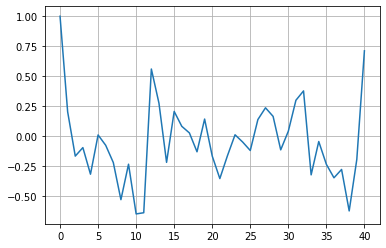

In [23]:
from statsmodels.tsa.stattools import acf,pacf
ac=acf(dflog.dropna())
plt.plot(ac)
plt.grid()
plt.show()
pac=pacf(dflog.dropna())
plt.plot(pac)
plt.grid()
plt.show()

Assigning ACF(Aauto-correlation Function) and PACF(Partial Auto-Correlation Function) plots 

In [24]:
from statsmodels.tsa import arima_model
arima=arima_model.ARIMA(df,(2,1,2))
model=arima.fit()

C:\Users\kssee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kssee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(p,d,q)=ARIMA(2,1,2)
p is the number of autoregressive terms,
d is the number of nonseasonal differences needed for stationarity, and
q is the number of lagged forecast errors in the prediction equation.

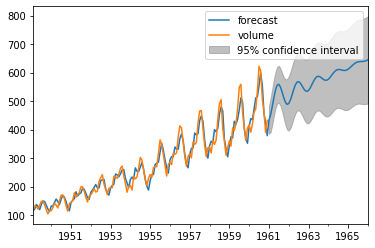

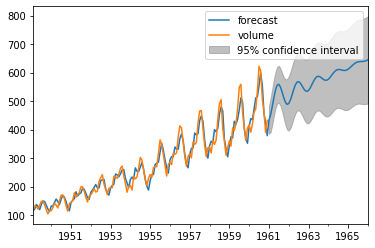

In [25]:
model.plot_predict(start=1,end=204)